In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12752929327942316605, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5389378668664872567
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8698537502815811944
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6480271233550757191
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install -q keras

In [9]:
!unzip -uq "/content/drive/My Drive/Colab Notebooks/traincopy.zip" -d "/content/drive/My Drive/Colab Notebooks/train/"

In [15]:
train_path = '/content/drive/My Drive/Colab Notebooks/train/train copy/train'
test_path = '/content/drive/My Drive/Colab Notebooks/train/train copy/test'

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train = train_datagen.flow_from_directory(train_path,target_size=(224, 224),color_mode='rgb',classes=['cat','dog'],class_mode='binary',batch_size=32)
test = test_datagen.flow_from_directory(test_path,target_size=(224, 224),color_mode='rgb',classes=['cat','dog'],class_mode='binary',batch_size=32)

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [41]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

vgg16_model = VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

vgg16_model.trainable = False



In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 25089     
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [43]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
train_steps=train.n//train.batch_size
validation_steps=test.n//test.batch_size
history = model.fit(train,steps_per_epoch=train_steps,validation_data=test,validation_steps=validation_steps,epochs=5)

Epoch 1/5
703/703 [==============================] - 152s 216ms/step - loss: 0.9468 - accuracy: 0.9669 - val_loss: 0.9173 - val_accuracy: 0.9776
Epoch 2/5
703/703 [==============================] - 151s 215ms/step - loss: 0.3908 - accuracy: 0.9870 - val_loss: 0.7665 - val_accuracy: 0.9792
Epoch 3/5
703/703 [==============================] - 151s 215ms/step - loss: 0.2194 - accuracy: 0.9916 - val_loss: 1.0501 - val_accuracy: 0.9784
Epoch 4/5
703/703 [==============================] - 152s 216ms/step - loss: 0.1267 - accuracy: 0.9948 - val_loss: 1.1521 - val_accuracy: 0.9812
Epoch 5/5
703/703 [==============================] - 151s 215ms/step - loss: 0.1026 - accuracy: 0.9956 - val_loss: 1.1288 - val_accuracy: 0.9808


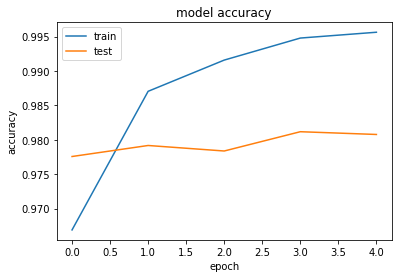

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
